# EDA (exploration data analysis)

## Исследуем продажи магазина

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-forecasting/train.csv


In [2]:
df = pd.read_csv('../input/sales-forecasting/train.csv', index_col = 0)

In [3]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [4]:
# Посмотрим на данные
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


Почти нет null-значений, кроме пропущенных в Postal Code

In [5]:
# Узнаем, где пропущен почтовый индекс
df[df['Postal Code'].isnull()].State

Row ID
2235    Vermont
5275    Vermont
8799    Vermont
9147    Vermont
9148    Vermont
9149    Vermont
9387    Vermont
9388    Vermont
9389    Vermont
9390    Vermont
9742    Vermont
Name: State, dtype: object

Обнаружен штат, обделённый почтовыми индексами. Хорошо, что такой лишь один

In [6]:
# Преобразуем даты в соответствующий формат
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### Разброс цен

In [7]:
df.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

### Какие товары чаще покупают

In [8]:
df.groupby(['Category', 'Sub-Category']).Sales.count().sort_values(ascending = False)

Category         Sub-Category
Office Supplies  Binders         1492
                 Paper           1338
Furniture        Furnishings      931
Technology       Phones           876
Office Supplies  Storage          832
                 Art              785
Technology       Accessories      756
Furniture        Chairs           607
Office Supplies  Appliances       459
                 Labels           357
Furniture        Tables           314
Office Supplies  Envelopes        248
Furniture        Bookcases        226
Office Supplies  Fasteners        214
                 Supplies         184
Technology       Machines         115
                 Copiers           66
Name: Sales, dtype: int64

Больше всего продаются папки и бумага - какие неэкологичные покупатели

In [9]:
# Какие товары в принципе продаются в магазине
print(*df['Sub-Category'].unique().tolist(), sep='\n')

Bookcases
Chairs
Labels
Tables
Storage
Furnishings
Art
Phones
Binders
Appliances
Paper
Accessories
Envelopes
Fasteners
Supplies
Machines
Copiers


### Покупающие штаты

<AxesSubplot:xlabel='State', ylabel='count'>

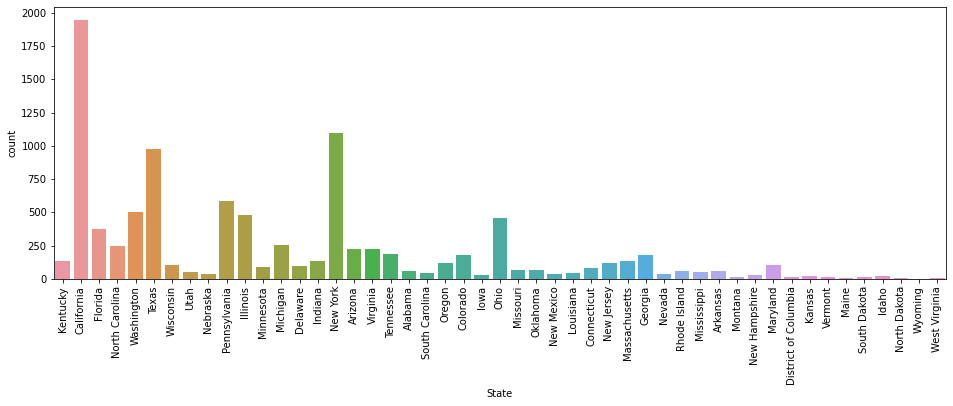

In [10]:
plt.figure(figsize=(16,5))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'State')

Больше всего заказов в Калифорнии, довольно много в Нью-Йорке и Техасе

In [11]:
# Самые покупающие города
df.groupby(['State', 'City']).Sales.count().sort_values(ascending = False)[:10]

State         City         
New York      New York City    891
California    Los Angeles      728
Pennsylvania  Philadelphia     532
California    San Francisco    500
Washington    Seattle          426
Texas         Houston          374
Illinois      Chicago          308
California    San Diego        170
Texas         Dallas           156
Ohio          Columbus         120
Name: Sales, dtype: int64

### Самые покупающие потребители 

In [12]:
df.groupby(['Customer Name']).Sales.count().sort_values(ascending = False)[:10]

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Jonathan Doherty       32
Seth Vernon            32
Chloris Kastensmidt    32
Zuschuss Carroll       31
Emily Phan             31
Arthur Prichep         31
Name: Sales, dtype: int64

### Динамика продаж

In [13]:
df['Order Year'] = df['Order Date'].dt.year

In [14]:
df['Order Month'] = df['Order Date'].dt.month

<AxesSubplot:xlabel='Order Year,Order Month'>

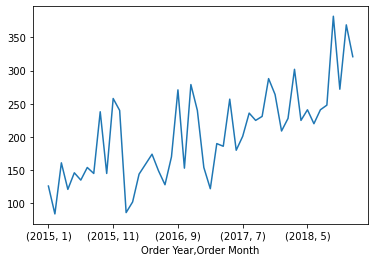

In [15]:
df.groupby(['Order Year', 'Order Month']).Sales.count().plot()

### Выводы

- Стоит проверить, вводят ли покупатели из штата Vermont индекс. Если это техническая проблема, решить её. Если покупатели не вводят индекс - попросить их об этом (сделать поле для ввода обязательным) 
- 50% цен ниже 54.49 USD, 75% цен ниже 210.605 USD
- Магазин специализируется на товарах для офиса, больше всего продаются папки и бумага (очень неэкологично, я бы посоветовал этим покупателям электронный документооборот, но для магазина это невыгодно)
- Самые покупающие штаты: Калифорния, Нью-Йорк и Техас
- Рост продаж увеличивается, динамика положительная